<a href="https://colab.research.google.com/github/harishgawade1999/Bike_Sharing_Demand_Prediction_Capstone_Project/blob/main/New_Harish_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [239]:
# importing the dataset
directory_path = "/content/drive/MyDrive/Bike Share/"
bike_df = pd.read_csv(directory_path + "SeoulBikeData.csv", encoding= 'unicode_escape')

# **Getting to Know about Data**

At the very first, we will start understanding the data.

In [240]:
# first look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [241]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


This dataset contains the data of rented bike count in the city of seoul. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.

In [242]:
bike_df.shape

(8760, 14)

In [243]:
bike_df.columns= map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [244]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

Dataset contains 8760 rows and 14 columns from which "rented bike count" is our target variable. There are numerical variables as well as categorical variables and one date variable which is stored as object so we can change its dtype.

In [245]:
# changing dtype of date column
def get_date(date_str):
  date_obj= dt.datetime.strptime(date_str, '%d/%m/%Y')
  date_obj= pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)

In [246]:
# extracting date, month and day of week
bike_df['day']= bike_df['date'].dt.day
bike_df['month']= bike_df['date'].dt.month
bike_df['year']= bike_df['date'].dt.year
bike_df['day_of_week'] = bike_df['date'].dt.day_name()

bike_df= bike_df.drop("date", axis= 1)

In [247]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rented bike count          8760 non-null   int64  
 1   hour                       8760 non-null   int64  
 2   temperature(°c)            8760 non-null   float64
 3   humidity(%)                8760 non-null   int64  
 4   wind speed (m/s)           8760 non-null   float64
 5   visibility (10m)           8760 non-null   int64  
 6   dew point temperature(°c)  8760 non-null   float64
 7   solar radiation (mj/m2)    8760 non-null   float64
 8   rainfall(mm)               8760 non-null   float64
 9   snowfall (cm)              8760 non-null   float64
 10  seasons                    8760 non-null   object 
 11  holiday                    8760 non-null   object 
 12  functioning day            8760 non-null   object 
 13  day                        8760 non-null   int64

In [248]:
# checking for duplicate values
bike_df.duplicated().sum()

0

In [249]:
# checking for missing values
bike_df.isnull().sum()

rented bike count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind speed (m/s)             0
visibility (10m)             0
dew point temperature(°c)    0
solar radiation (mj/m2)      0
rainfall(mm)                 0
snowfall (cm)                0
seasons                      0
holiday                      0
functioning day              0
day                          0
month                        0
year                         0
day_of_week                  0
dtype: int64

Above we can see there are no missing values as well as no duplicate values in the dataset.

In [250]:
bike_df.describe(include='all')

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,year,day_of_week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000,8760.000000,8760.000000,8760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes,NaN,NaN,NaN,Friday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN,NaN,NaN,1272
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,15.720548,6.526027,2017.915068,NaN
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,8.796749,3.448048,0.278796,NaN
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,2017.000000,NaN
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,4.000000,2018.000000,NaN
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,16.000000,7.000000,2018.000000,NaN
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,23.000000,10.000000,2018.000000,NaN


##So after transforming data into data type we required,We can now do Bivariate analysis.

# **Exploratory Data Analysis**

## **Bivariate Analysis**

### **Dependent Variable**

First we will start with analyzing our target variable which is **rented bike count**.

In [251]:
dependent_var= "rented bike count"

In [252]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

In [253]:
bike_df[dependent_var].value_counts()

0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: rented bike count, Length: 2166, dtype: int64

### Numerical Variables v/s rented bike count

In [254]:
# numerical variables
num_variables= list(bike_df.describe().columns[1:])
num_variables

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)',
 'day',
 'month',
 'year']

In [255]:
bike_df[num_variables].describe()

,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),day,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


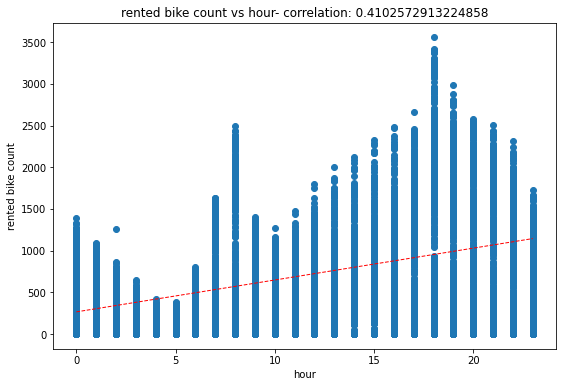

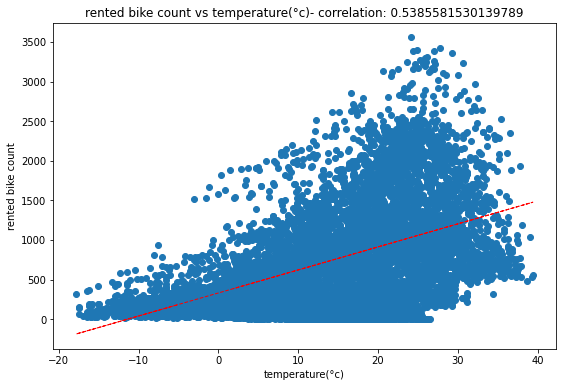

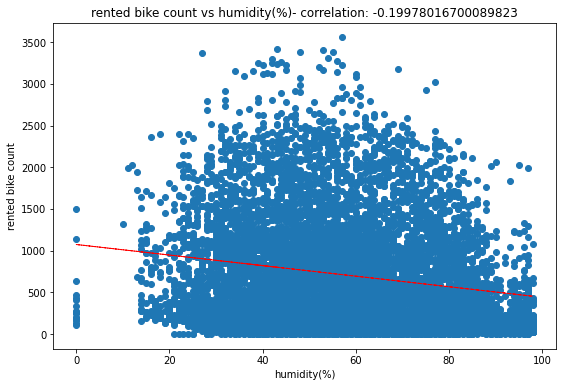

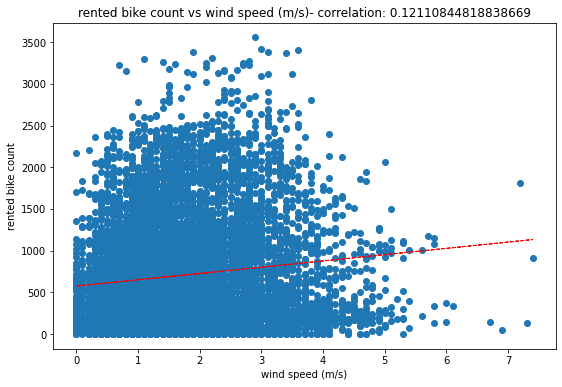

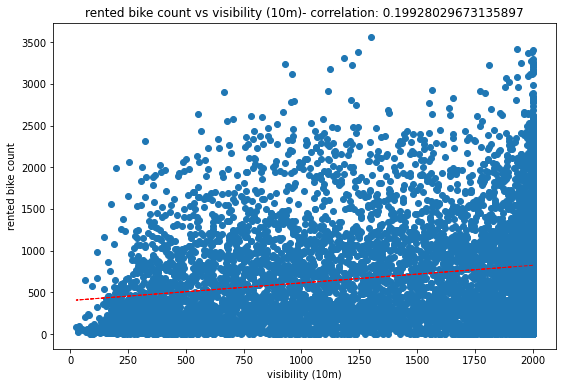

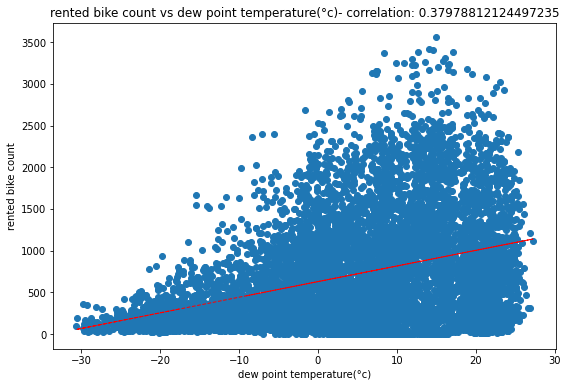

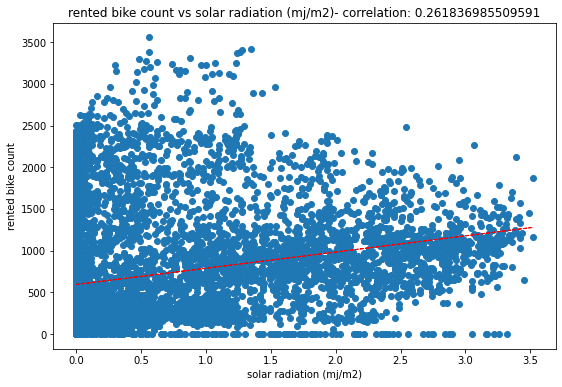

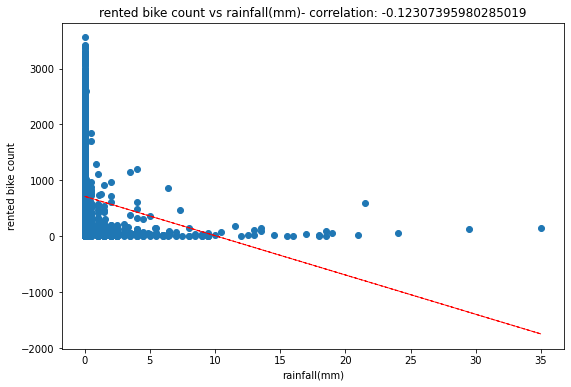

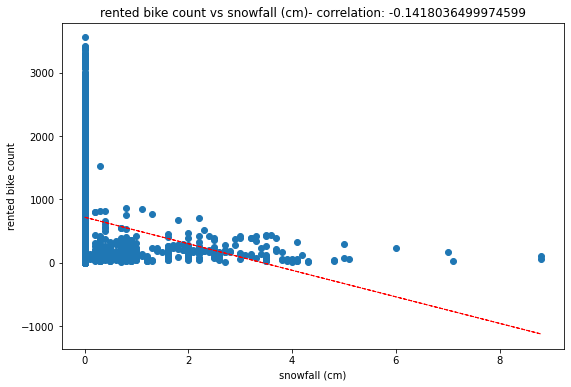

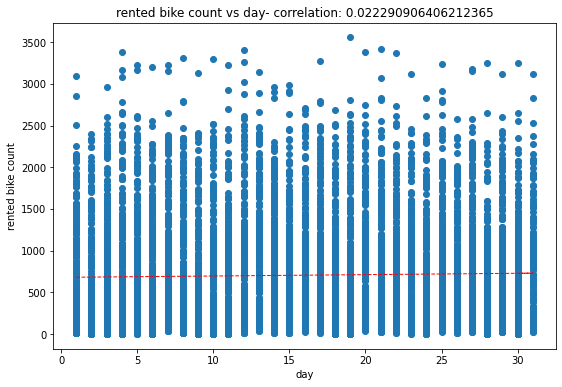

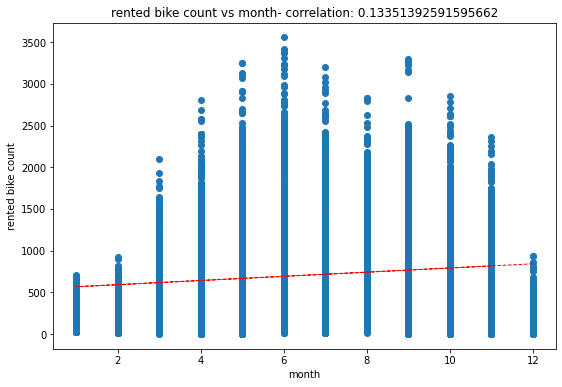

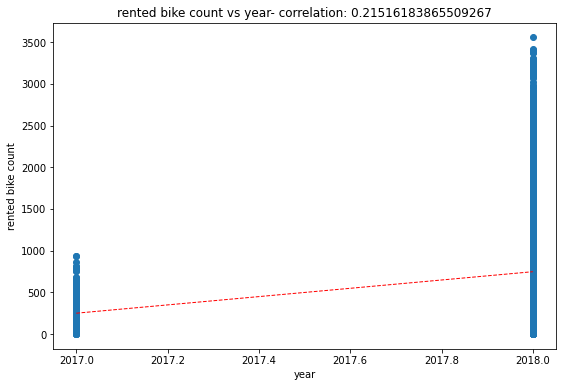

In [256]:
# scatterplot numerical_var v/s rented bike count
for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['rented bike count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented bike count')
    ax.set_title('rented bike count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['rented bike count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()

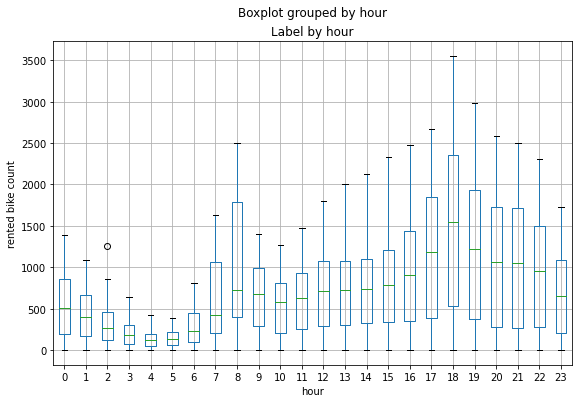

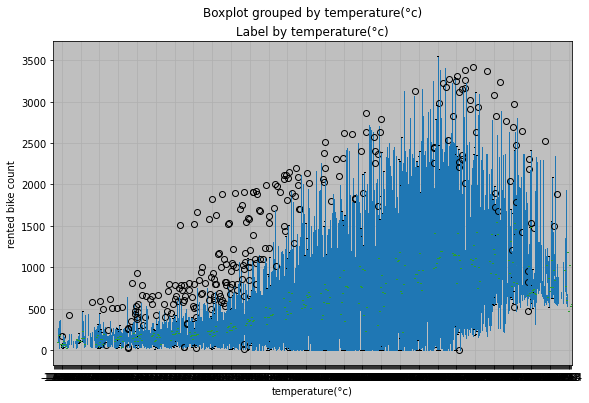

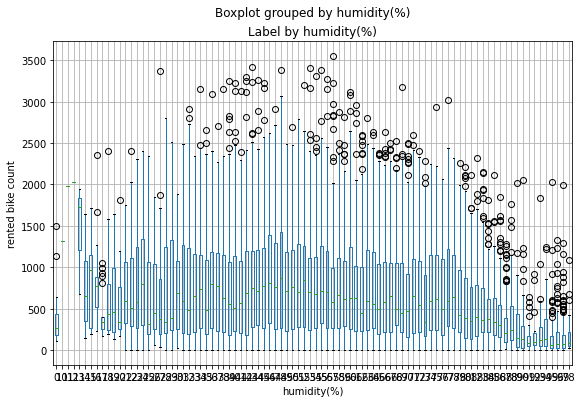

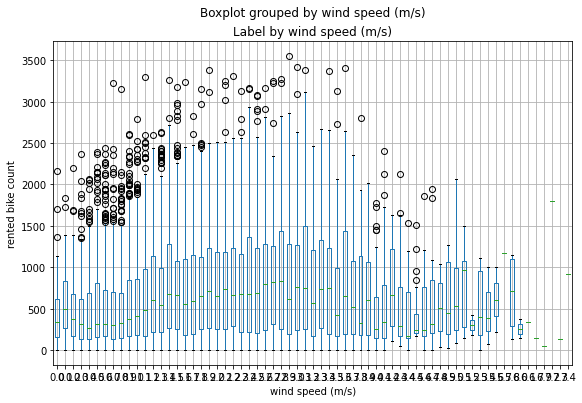

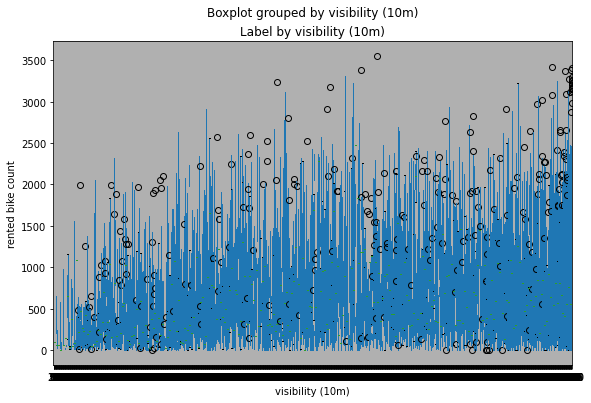

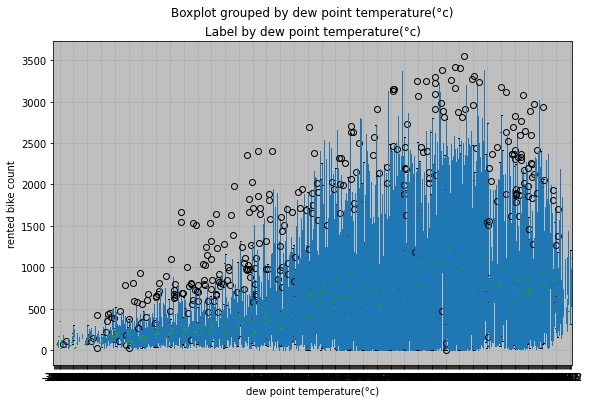

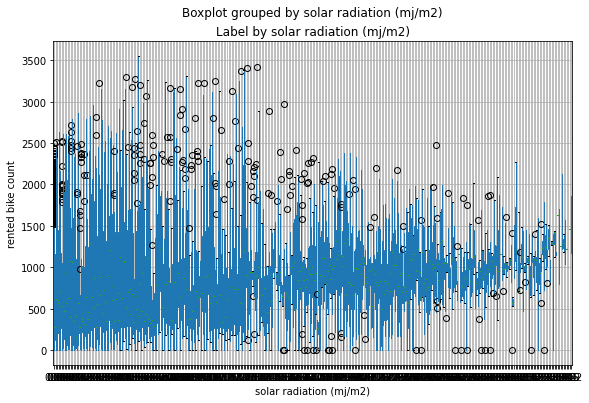

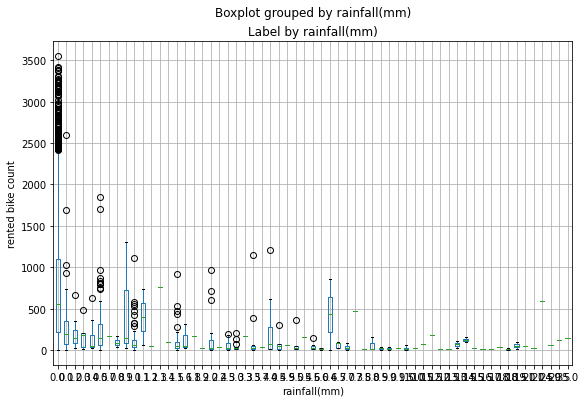

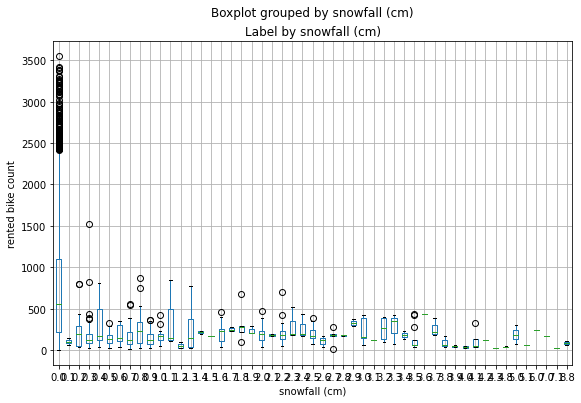

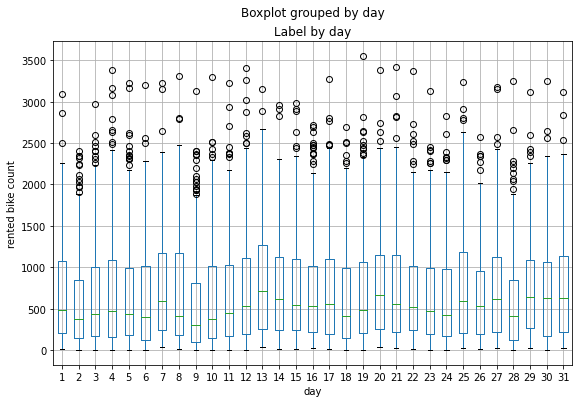

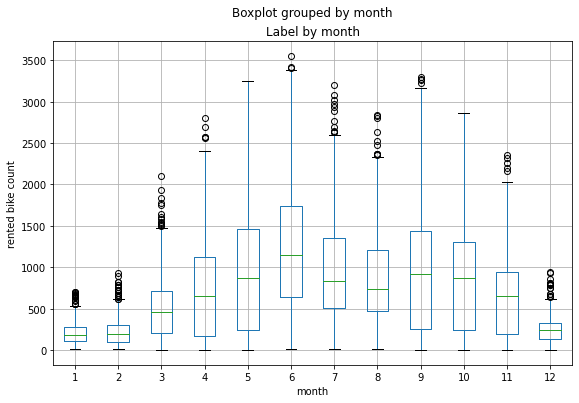

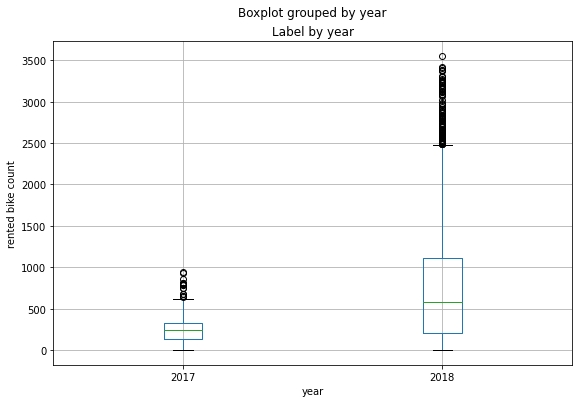

In [257]:
# boxplot numerical_var v/s rented bike count
for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'rented bike count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented bike count")
plt.show()

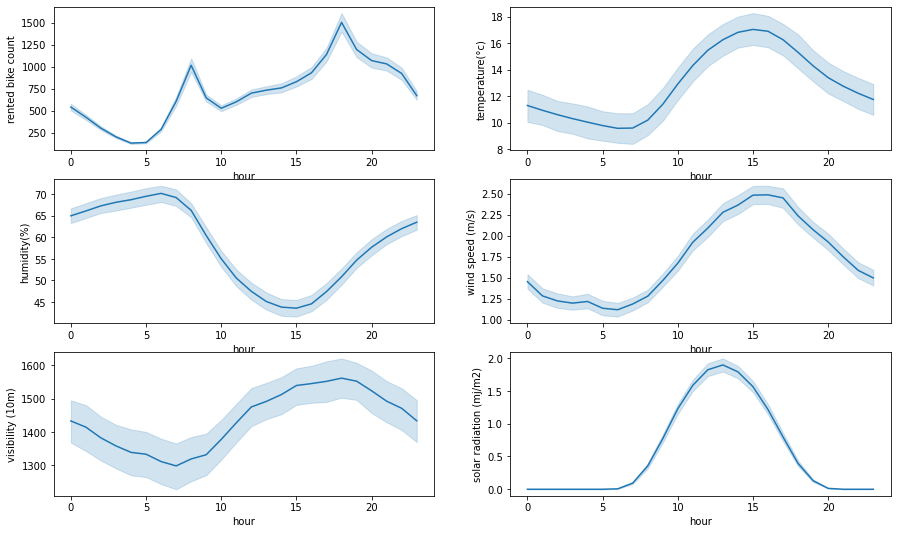

In [258]:
# Analysis of numerical variables during hours
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('hour', 'rented bike count', data=bike_df, ax=ax[0][0])

sns.lineplot('hour', 'temperature(°c)', data=bike_df, ax=ax[0][1])

sns.lineplot('hour', 'humidity(%)', data=bike_df, ax=ax[1][0])

sns.lineplot('hour', 'wind speed (m/s)', data=bike_df, ax=ax[1][1])

sns.lineplot('hour', 'visibility (10m)', data=bike_df, ax=ax[2][0])

sns.lineplot('hour', 'solar radiation (mj/m2)', data=bike_df, ax=ax[2][1])

plt.show()

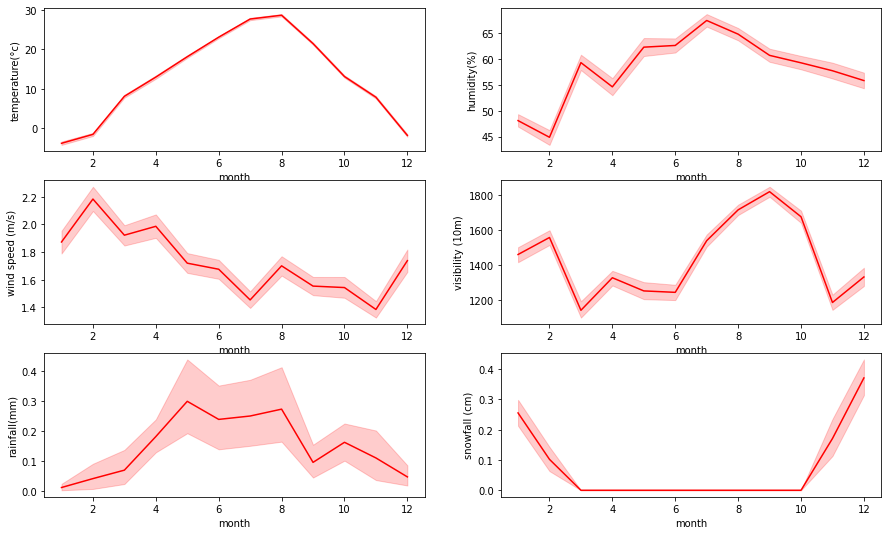

In [259]:
#Analysis of numerical variables across months
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('month', 'temperature(°c)', data=bike_df, color='r', ax=ax[0][0])

sns.lineplot('month', 'humidity(%)', data=bike_df, color='r', ax=ax[0][1])

sns.lineplot('month', 'wind speed (m/s)', data=bike_df, color='r', ax=ax[1][0])

sns.lineplot('month', 'visibility (10m)', data=bike_df, color='r', ax=ax[1][1])

sns.lineplot('month', 'rainfall(mm)', data=bike_df, color='r', ax=ax[2][0])

sns.lineplot('month', 'snowfall (cm)', data=bike_df, color='r', ax=ax[2][1])

plt.show()

### Categorical Variables v/s rented bike count

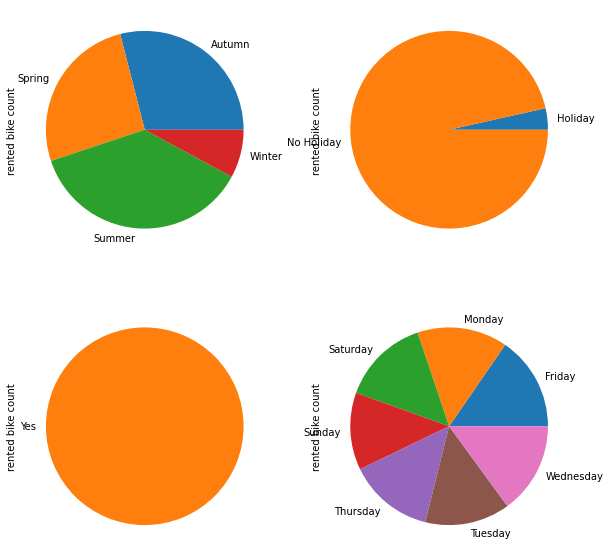

In [260]:
# pie chart Categorical Variables v/s rented bike count
fig, ax = plt.subplots(2,2,figsize=(10,10))

bike_df.groupby('seasons').sum()['rented bike count'].plot.pie(ax= ax[0][0])

bike_df.groupby('holiday').sum()['rented bike count'].plot.pie(ax= ax[0][1])

bike_df.groupby('functioning day').sum()['rented bike count'].plot.pie(ax= ax[1][0])

bike_df.groupby('day_of_week').sum()['rented bike count'].plot.pie(ax= ax[1][1])

plt.show()

##Categorical Variables v/s rented bike count

In [261]:
cat_variables= ['seasons', 'holiday', 'functioning day']
cat_variables

['seasons', 'holiday', 'functioning day']

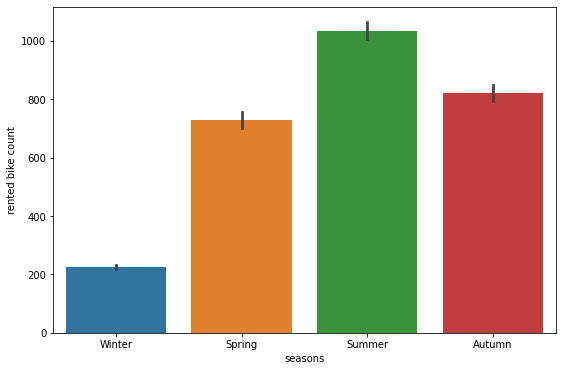

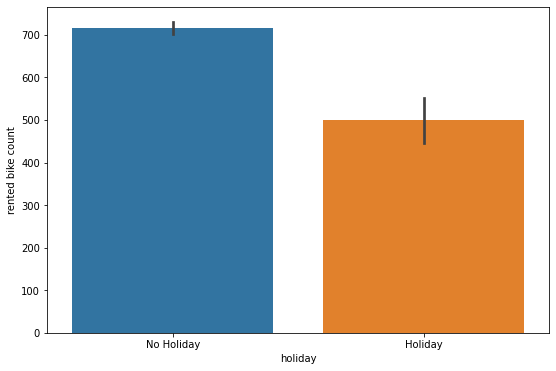

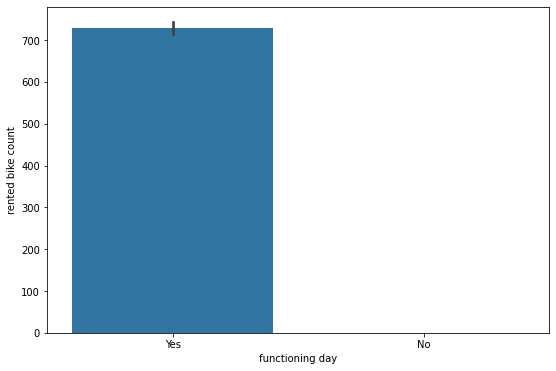

In [262]:
for col in cat_variables:
  fig= plt.figure(figsize=(9,6))
  sns.barplot(x=col,y='rented bike count',data=bike_df)

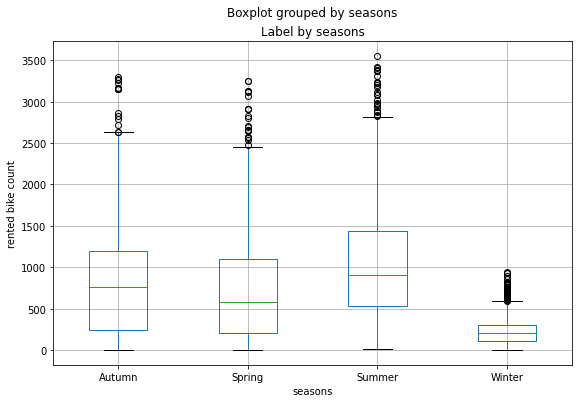

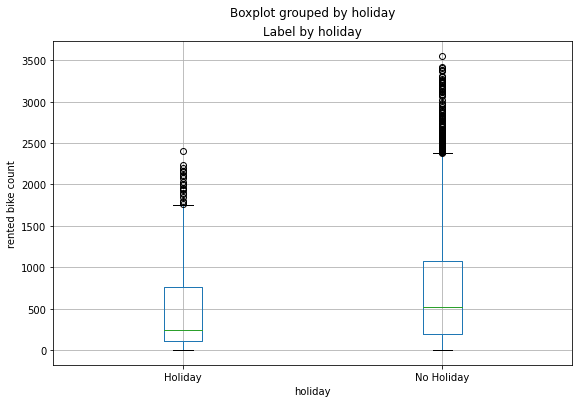

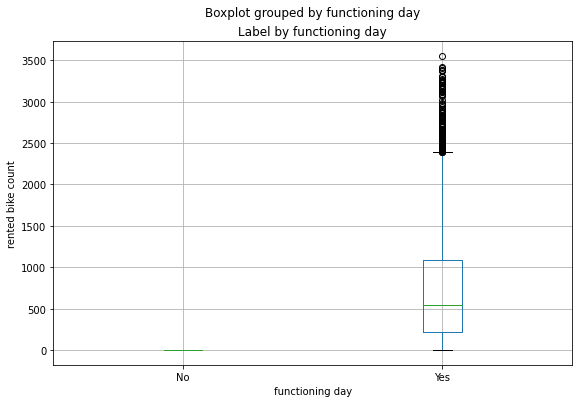

In [263]:
# boxplot categorical_var v/s rented bike count
for col in cat_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'rented bike count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented bike count")
plt.show()

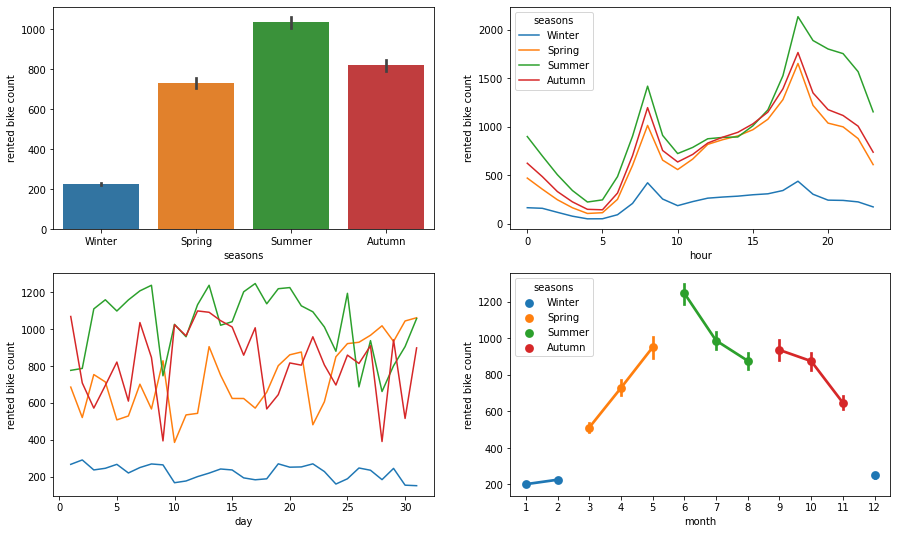

In [264]:
# Analysis of rented bike count on hour, day and monthly basis
fig, ax = plt.subplots(2,2,figsize=(15,9))

sns.barplot(x= 'seasons', y= dependent_var, data= bike_df, ax= ax[0][0])

sns.lineplot(x= 'hour', y= dependent_var, hue= 'seasons',
             ci=None, data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'day', y= dependent_var, hue= 'seasons',
             ci=None, data= bike_df, legend=False, ax= ax[1][0])

sns.pointplot(x= 'month', y= dependent_var, hue= 'seasons',
              data= bike_df, ax= ax[1][1])

plt.show()

* There is a huge demand for bike rents in summer season while the least bike rents occur in winter.
* We can see there is a high demand for rented bike in the month of June, August and less demand in the month of December, January and February i.e winter season.
* Non holidays have comparatively high demand for rented bikes as compared to holidays. 
* There is a high demand for rented bikes during office days and demand decreases slightly on Sunday.


# **Feature Selection**

### **Correlation**

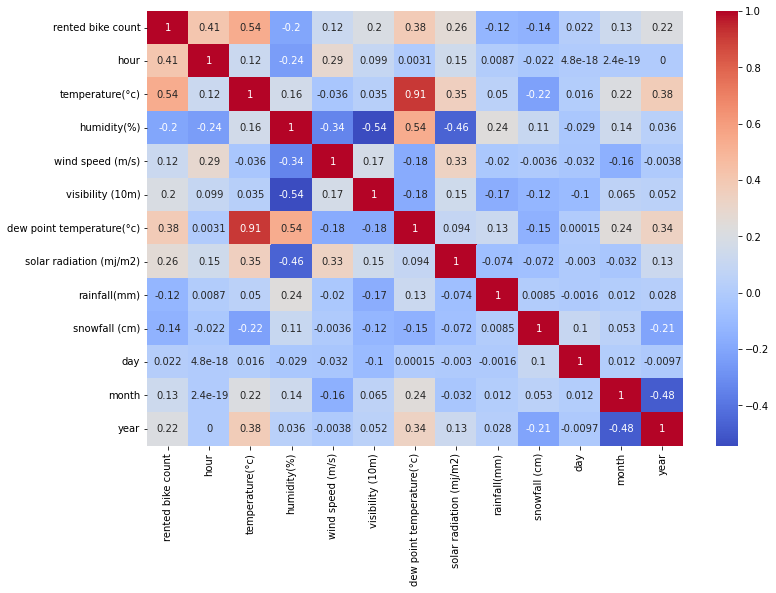

In [265]:
corr_df= bike_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True, cmap= 'coolwarm');

The most correlated features to the rented bike count are:
* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)

There is a high correlation between dew point temperature(°c) and temperature(°c).

In [266]:
bike_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,year,day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday


### **Detecting Multicollinearity using VIF**

In [267]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [268]:
calc_vif(bike_df[[i for i in num_variables]])

,variables,VIF
0,hour,4.458880
1,temperature(°c),188.666573
2,humidity(%),187.533688
3,wind speed (m/s),4.890096
4,visibility (10m),10.788995
5,dew point temperature(°c),126.954261
6,solar radiation (mj/m2),2.904971
7,rainfall(mm),1.103386
8,snowfall (cm),1.155412
9,day,4.379818


We can see here that the 'year', 'dew point temperature(°c)', 'temperature(°c)', and 'humidity(%)'  have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

In [269]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month'
calc_vif(bike_df[[i for i in num_variables if i not in ['dew point temperature(°c)', 'year', 'day', 'month']]])

,variables,VIF
0,hour,3.921832
1,temperature(°c),3.228318
2,humidity(%),4.868221
3,wind speed (m/s),4.608625
4,visibility (10m),4.710170
5,solar radiation (mj/m2),2.246791
6,rainfall(mm),1.079158
7,snowfall (cm),1.120579


In [270]:
dataset= bike_df.drop(['dew point temperature(°c)', 'year', 'day', 'month'], axis=1)

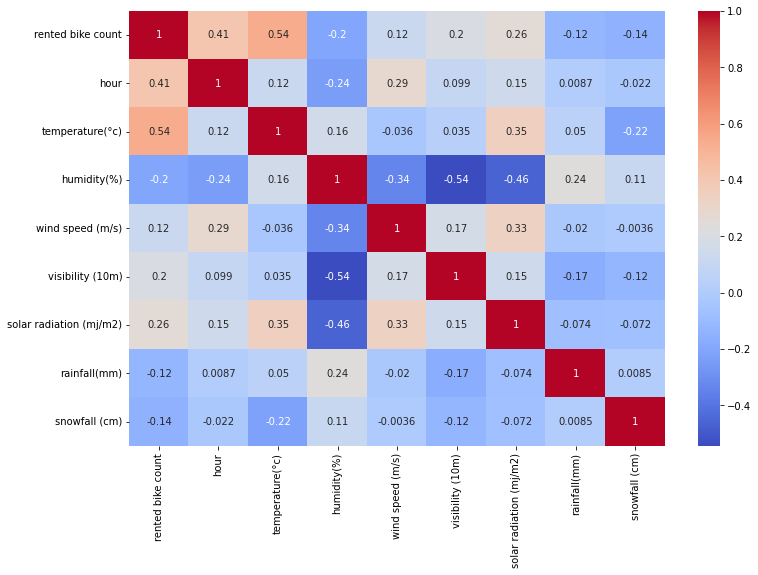

In [271]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap= 'coolwarm');

## **Feature Engineering**




In [272]:
# creating column of weekend or not
dataset['weekend']= dataset['day_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
dataset.drop('day_of_week', axis=1, inplace=True)

In [273]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

dataset[['seasons','holiday','functioning day']] = dataset[['seasons','holiday','functioning day']].apply(label_en.fit_transform)

In [274]:
dataset.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


### **Train Test split**

In [275]:
X= dataset.drop(dependent_var, axis=1)
y= np.sqrt(dataset[dependent_var])

In [276]:
X.head()

,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,weekend
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


In [277]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented bike count, dtype: float64

In [278]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [279]:
print(X_train.shape, y_train.shape)

(6132, 12) (6132,)


In [280]:
print(X_test.shape, y_test.shape)

(2628, 12) (2628,)


# **Linear Regression**

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
# create an instance of linear regression
lin_reg = LinearRegression()

# fitting Linear Regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [283]:
# model score
lin_reg.score(X_train, y_train)

0.6540967727241054

In [284]:
lin_reg.coef_

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [285]:
lin_reg.intercept_

-7.367857457543842

In [286]:
# predictions on train and test data
train_pred_lr= lin_reg.predict(X_train)
test_pred_lr= lin_reg.predict(X_test)

### **Evaluation Metrics**

Creating funtion to calculate evaluation metrics

In [287]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  ''' takes actual target values and estimated target values as input
      and returns evaluation metrics as output '''

  MSE  = mean_squared_error(y_true, y_pred)
  print("MSE :" , MSE)
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  MAE= mean_absolute_error(y_true, y_pred)
  print("MAE :",MAE)
  print(" ")
  r2 = r2_score(y_true, y_pred)
  print("R2 :" ,r2)
  adj_r2 = 1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]


In [288]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lr, model='Linear',train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.63805172995284
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [289]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lr, model='Linear',train=False)

MSE : 53.740491144516426
RMSE : 7.330790622062291
MAE : 5.661287586240897
 
R2 : 0.6501226505752834
Adjusted R2 :  0.6485170948609061


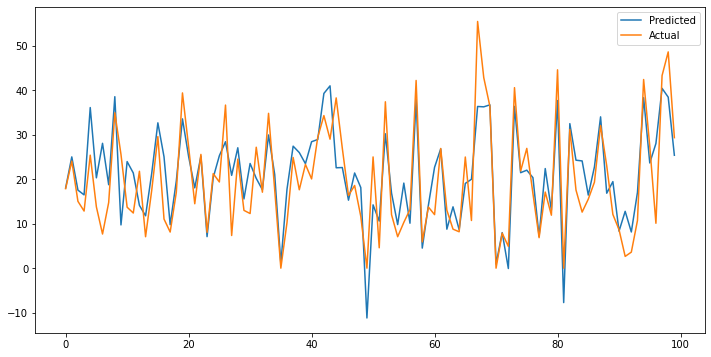

In [290]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lr[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

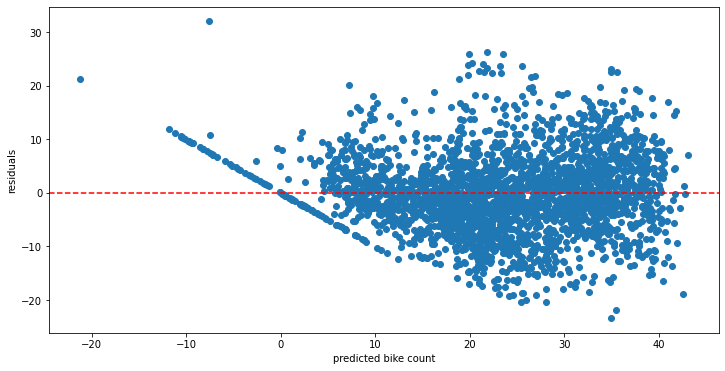

In [291]:
#Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lr, y_test- test_pred_lr)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Lasso Regression**

In [292]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [293]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.0001}


In [294]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

### **Evaluation Metrics**

In [295]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 53.80611534623119
RMSE : 7.3352651858151106
MAE : 5.63804777968967
 
R2 : 0.6540967679051862
Adjusted R2 :  0.6525094490580972


In [296]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 53.74016699398597
RMSE : 7.330768513190549
MAE : 5.661284867852185
 
R2 : 0.6501247609565992
Adjusted R2 :  0.6485192149265722


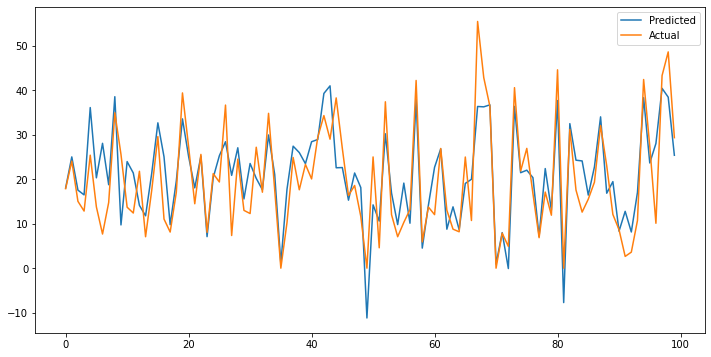

In [297]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lasso[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

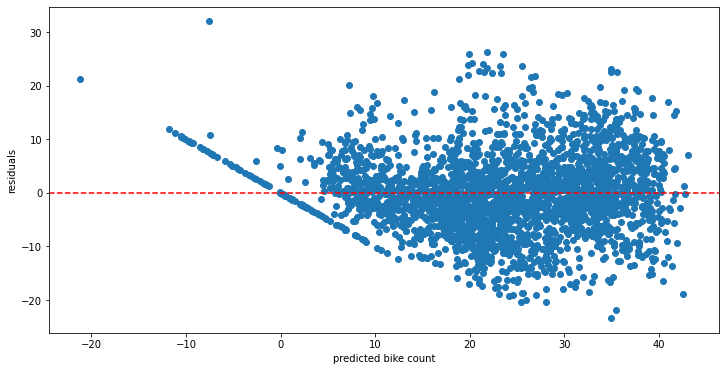

In [298]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lasso, y_test- test_pred_lasso)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Ridge regression**

In [299]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# cross validation
param_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, param_ridge, cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [300]:
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 1e-10}


In [301]:
# predictions on train and test dataset
train_pred_ridge = ridge_reg.predict(X_train)
test_pred_ridge= ridge_reg.predict(X_test)

### **Evaluation Metrics**

In [302]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_ridge, 'Ridge', train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952847
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [303]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_ridge, 'Ridge', train=False)

MSE : 53.74049114451563
RMSE : 7.330790622062237
MAE : 5.661287586240932
 
R2 : 0.6501226505752886
Adjusted R2 :  0.6485170948609114


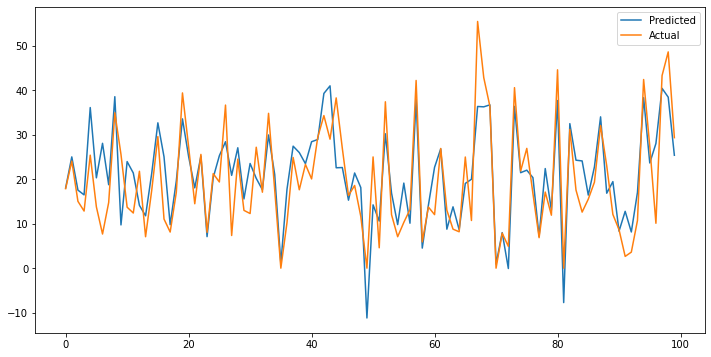

In [304]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_ridge[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

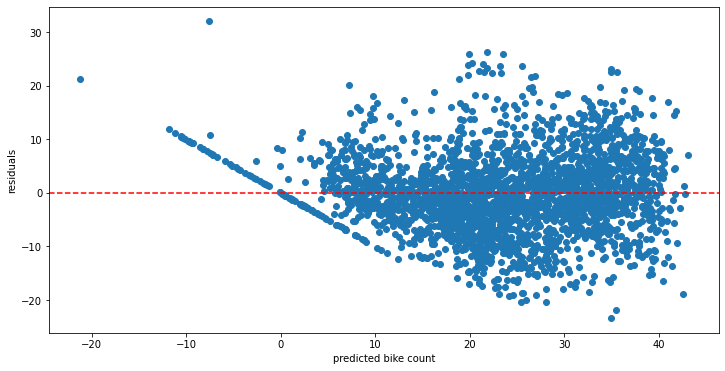

In [305]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_ridge, y_test- test_pred_ridge)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Elastic Net Regression**

In [306]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

# parameters
en_param = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,100],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5]
              }

en_grid= GridSearchCV(elasticnet, en_param, cv= 5)
en_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [307]:
en_grid.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.2}

In [308]:
en_model= en_grid.best_estimator_

In [309]:
# predictions on train and test data
train_pred_en= en_model.predict(X_train)
test_pred_en= en_model.predict(X_test)

### **Evaluation Metrics**

In [310]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_en, 'Elastic net', train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952843
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [311]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_en, 'Elastic net', train=False)

MSE : 53.740491144516405
RMSE : 7.330790622062289
MAE : 5.661287586240901
 
R2 : 0.6501226505752835
Adjusted R2 :  0.6485170948609063


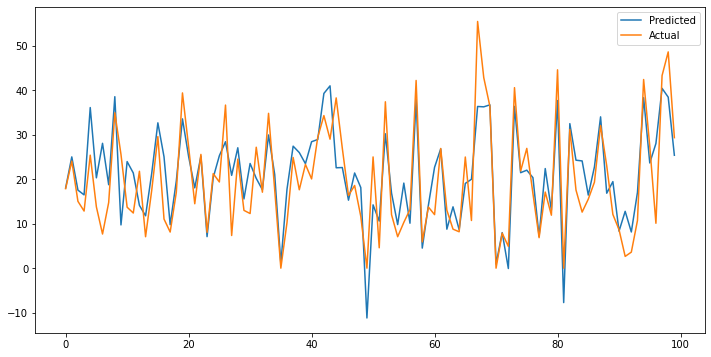

In [312]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_en[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

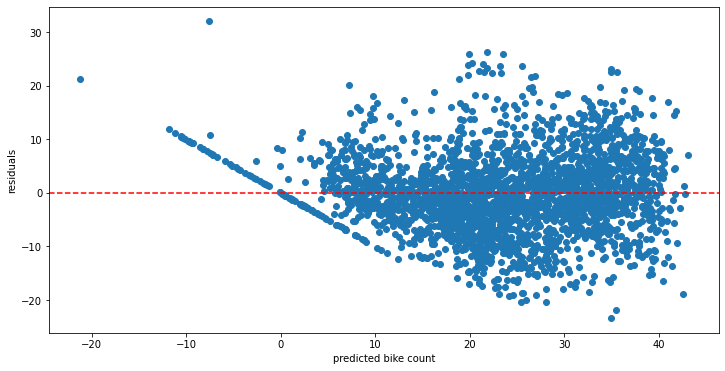

In [313]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_en, y_test- test_pred_en)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

## **DecisionTree Regressor**

In [314]:
from sklearn.tree import DecisionTreeRegressor

In [315]:
# Hyperparameter grid 
dt_params = {"criterion": ["mse", "mae"],
             "max_depth": [5, 6, 7, 8],
             "min_samples_split": [10, 20, 40],
             "min_samples_leaf": [20, 40, 100],
              }

In [316]:
# create an instance of DecisionTreeRegressor
dt_reg= DecisionTreeRegressor()

# GridSearch
dt_grid= GridSearchCV(estimator = dt_reg, param_grid = dt_params, cv = 5, verbose = 2)

dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=2)

In [317]:
# best parameters
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [318]:
dt_optimal_model= dt_grid.best_estimator_

In [319]:
# Model score
dt_optimal_model.score(X_train, y_train)

0.8613754775424959

In [320]:
# predictions on train and test data
train_pred_dt= dt_optimal_model.predict(X_train)
test_pred_dt= dt_optimal_model.predict(X_test)

### **Evaluation Metrics**

In [321]:
# train data evaluation metrics
evaluation_metrics(y_train, train_pred_dt, 'Decision Tree', train=True)

MSE : 21.56339216605
RMSE : 4.643639969468994
MAE : 3.218932170884279
 
R2 : 0.8613754775424959
Adjusted R2 :  0.8607393420665914


In [322]:
# test data evaluation metrics
evaluation_metrics(y_test, test_pred_dt, 'Decision Tree', train=False)

MSE : 24.623417452837717
RMSE : 4.962198852609367
MAE : 3.4556336932227656
 
R2 : 0.8396892948185077
Adjusted R2 :  0.8389536433989369


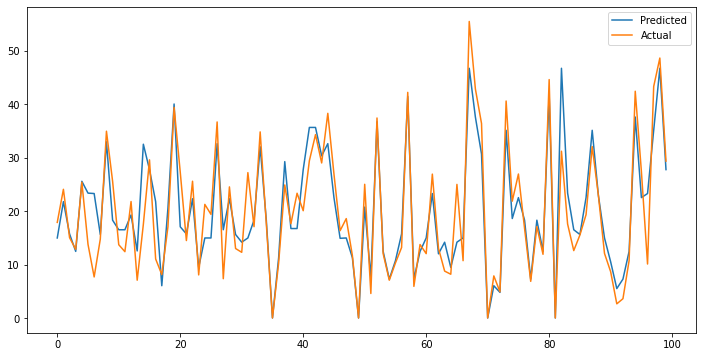

In [323]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_dt[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### **Feature Importance**

In [324]:
dt_optimal_model.feature_importances_

array([2.28746482e-01, 2.83530983e-01, 1.69522561e-01, 1.29193582e-04,
       4.96484172e-04, 3.60891331e-02, 1.91378840e-02, 1.44827097e-04,
       8.74705656e-02, 9.23499803e-04, 1.65381557e-01, 8.42683001e-03])

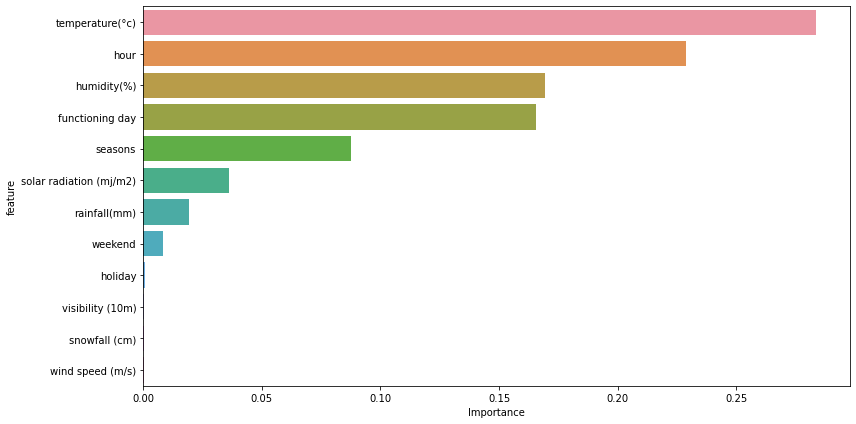

In [325]:
importances = list(dt_optimal_model.feature_importances_)

feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

importance_df= pd.DataFrame(feature_importances)
importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=importance_df)

plt.xlabel("Importance")
plt.tight_layout()

plt.show()

### **DecisionTree visualization**

In [326]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

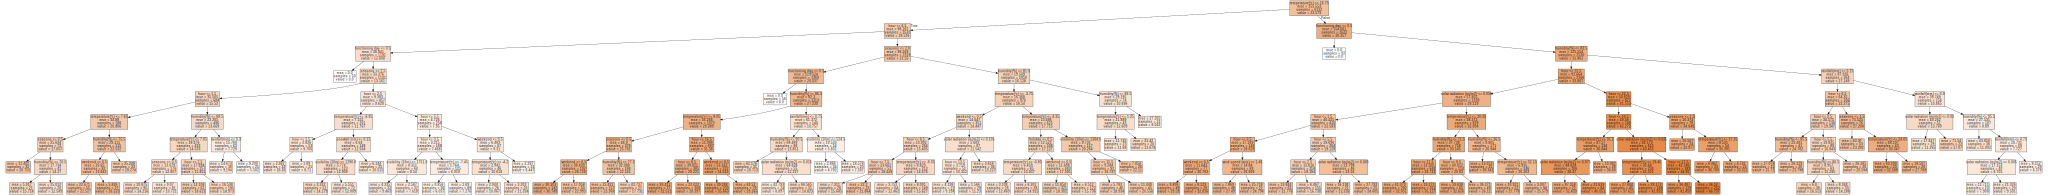

In [327]:
dot_data = tree.export_graphviz(dt_optimal_model, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 